In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [94]:
df = pd.read_csv('../../data/raw/airport_june_2019_empty.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,RH,WS,WD,AT
0,01-06-2019 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-06-2019 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-06-2019 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-06-2019 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2019 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


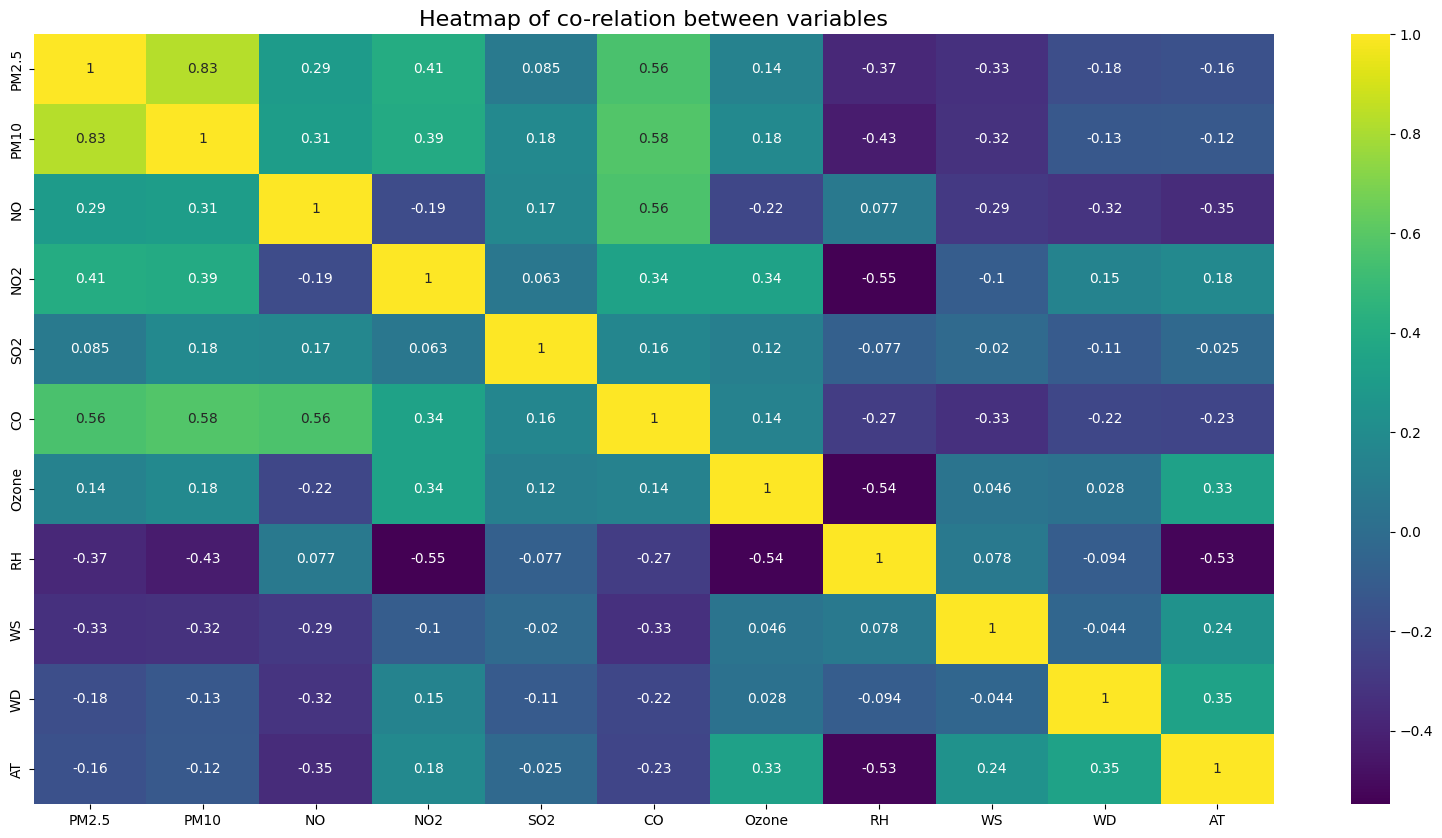

In [95]:
#Use heatmap to see corelation between variables
plt.figure(figsize=(20,10))

sns.heatmap(df.iloc[1:].corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [96]:
df.dtypes

From Date     object
PM2.5        float64
PM10         float64
NO           float64
NO2          float64
SO2          float64
CO           float64
Ozone        float64
RH           float64
WS           float64
WD           float64
AT           float64
dtype: object

In [97]:
# Check Missing Values
df.isna().sum()

From Date       0
PM2.5        3071
PM10         2304
NO           3103
NO2          4008
SO2          1981
CO           2352
Ozone        1905
RH           3229
WS           3231
WD           3229
AT           3284
dtype: int64

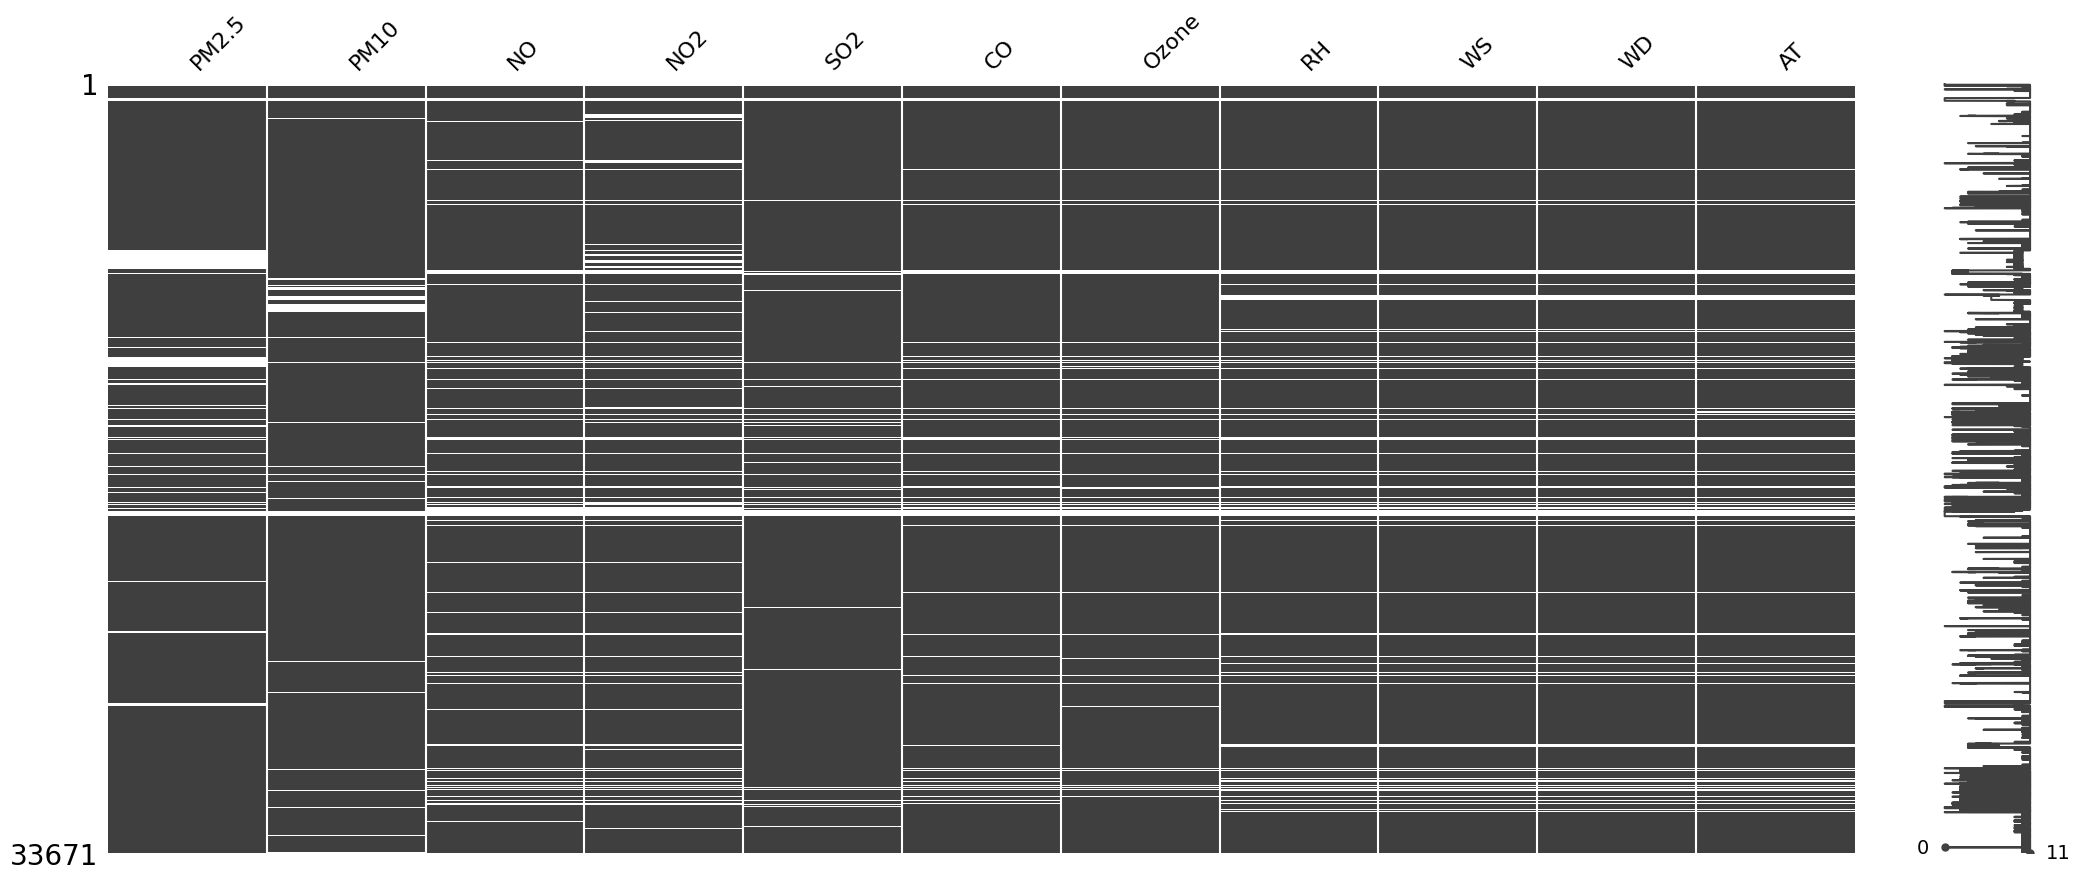

In [98]:
# Visualize the missingness 
msno.matrix(df.iloc[:,1:])
plt.show()

<AxesSubplot:>

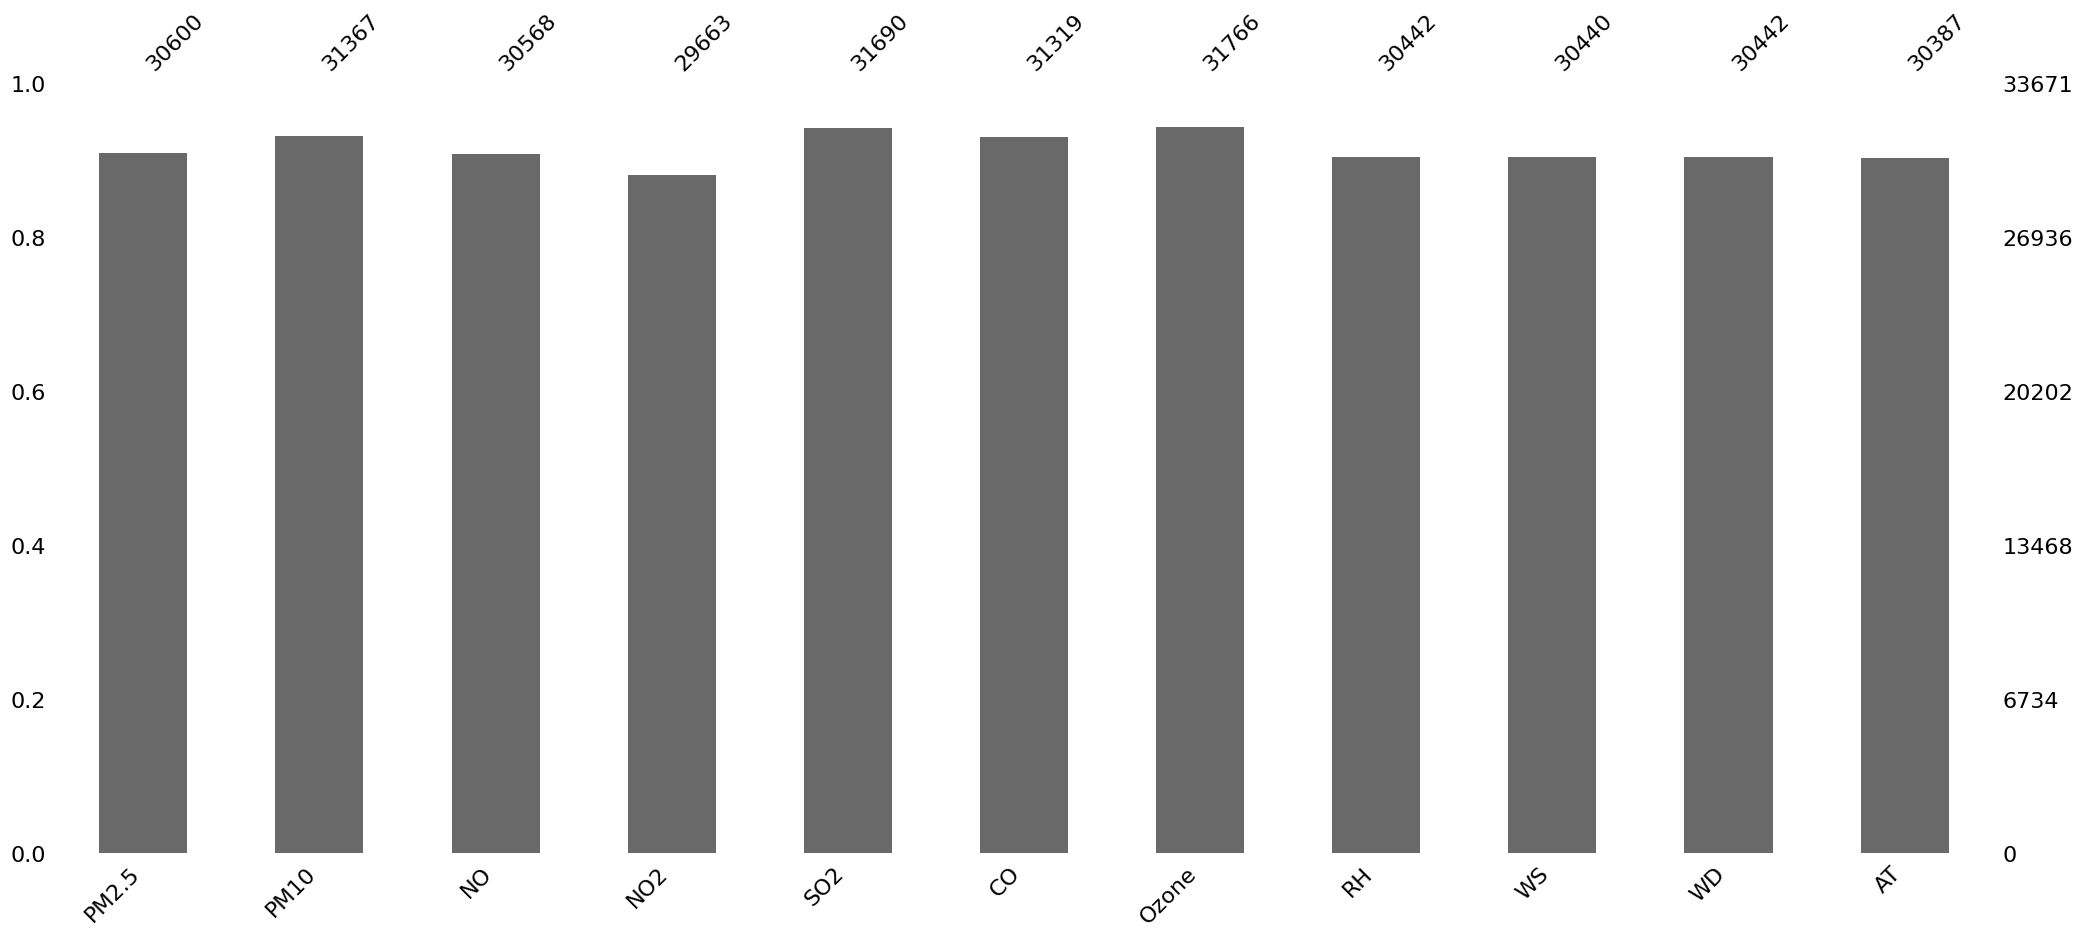

In [99]:
msno.bar(df.iloc[:,1:])

In [100]:
df.drop(['Toluene', 'RH','SR', 'VWS','BP', 'Xylene', 'RF'], axis=1, inplace=True)
df.head()

KeyError: "['Toluene' 'SR' 'VWS' 'BP' 'Xylene' 'RF'] not found in axis"

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,RH,WS,WD,AT
count,30600.000000,31367.000000,30568.000000,29663.000000,31690.000000,31319.000000,31766.000000,30442.000000,30440.000000,30442.000000,30387.000000
mean,39.746611,131.552159,66.385754,29.348466,10.215711,0.967928,21.833122,72.424411,0.907074,218.825493,28.375965
std,32.314145,94.746321,44.754709,24.437130,7.472883,0.709635,25.433573,17.469416,0.584814,61.716571,3.509329
min,0.030000,0.200000,0.010000,0.010000,0.010000,0.000000,0.010000,16.930000,0.190000,1.570000,16.470000
25%,16.000000,57.230000,34.570000,12.035000,5.850000,0.360000,6.090000,60.660000,0.530000,160.552500,26.030000
50%,31.000000,110.780000,57.890000,23.150000,8.860000,0.820000,14.480000,75.020000,0.800000,226.295000,28.000000
75%,56.970000,186.985000,87.940000,39.400000,12.880000,1.480000,25.460000,86.120000,1.130000,276.147500,30.600000
max,990.000000,995.000000,496.790000,223.120000,160.220000,7.670000,199.780000,99.950000,17.410000,330.290000,41.660000


C:\Users\HP\AppData\Local\Temp\ipykernel_14984\2134411511.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df.skew())


PM2.5    4.382813
PM10     1.953127
NO       1.681563
NO2      1.627622
SO2      2.983214
CO       0.836074
Ozone    2.767051
RH      -0.516197
WS       4.767622
WD      -0.248743
AT       0.176256
dtype: float64

<AxesSubplot:xlabel='PM10', ylabel='Count'>

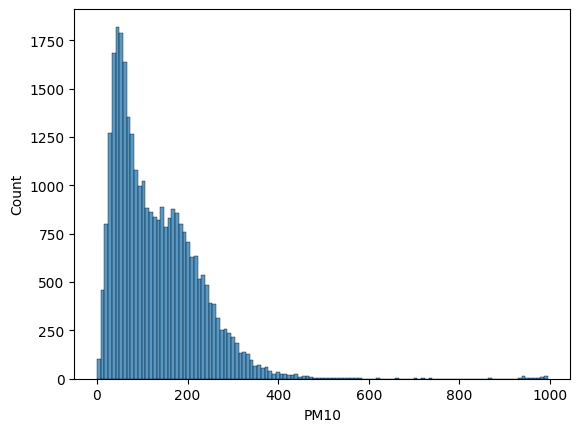

In [ ]:
display(df.skew())

# Plot a histogram of the data
display(sns.histplot(df['PM10'], kde=False))

In [ ]:
# print(df['From Date'].head())
print(df['From Date'].head())

0    01-06-2019 00:00
1    01-06-2019 01:00
2    01-06-2019 02:00
3    01-06-2019 03:00
4    01-06-2019 04:00
Name: From Date, dtype: object


In [ ]:
# Fill NaN values with monthly average of particular hour
#Split hour from time into new column
df['HOUR']=df['From Date'].apply(lambda x: int(x.split(' ')[1][:2]))
df.HOUR.head()

0    0
1    1
2    2
3    3
4    4
Name: HOUR, dtype: int64

In [ ]:
# Fill NaN values with monthly average of particular hour
#Split hour from time into new column
df['From Date'] = pd.to_datetime(df['From Date'], format = '%d-%m-%Y %H:%M')
df['From Date']

0       2019-06-01 00:00:00
1       2019-06-01 01:00:00
2       2019-06-01 02:00:00
3       2019-06-01 03:00:00
4       2019-06-01 04:00:00
                ...        
33666   2023-04-03 18:00:00
33667   2023-04-03 19:00:00
33668   2023-04-03 20:00:00
33669   2023-04-03 21:00:00
33670   2023-04-03 22:00:00
Name: From Date, Length: 33671, dtype: datetime64[ns]

In [ ]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date       0
PM2.5        3071
PM10         2304
NO           3103
NO2          4008
SO2          1981
CO           2352
Ozone        1905
RH           3229
WS           3231
WD           3229
AT           3284
HOUR            0
dtype: int64


In [ ]:
df.set_index('From Date',inplace=True)

In [ ]:
df['MONTH']=df.index.month     #Create month column (Run once)
df.reset_index(inplace=True)

In [ ]:
df.head()

,From Date,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,RH,WS,WD,AT,HOUR,MONTH
0,2019-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6
1,2019-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6
2,2019-06-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6
3,2019-06-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,6
4,2019-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6


In [ ]:
df['PM10']=df['PM10'].fillna(df.groupby(['MONTH','HOUR'])['PM10'].transform('mean'))
df['PM2.5']=df['PM2.5'].fillna(df.groupby(['MONTH','HOUR'])['PM2.5'].transform('mean'))
df['NO2']=df['NO2'].fillna(df.groupby(['MONTH','HOUR'])['NO2'].transform('mean'))
df['NO']=df['NO'].fillna(df.groupby(['MONTH','HOUR'])['NO'].transform('mean'))
df['SO2']=df['SO2'].fillna(df.groupby(['MONTH','HOUR'])['SO2'].transform('mean'))
df['CO']=df['CO'].fillna(df.groupby(['MONTH','HOUR'])['CO'].transform('mean'))
df['Ozone']=df['Ozone'].fillna(df.groupby(['MONTH','HOUR'])['Ozone'].transform('mean'))
df['RH']=df['RH'].fillna(df.groupby(['MONTH','HOUR'])['RH'].transform('mean'))
df['WS']=df['WS'].fillna(df.groupby(['MONTH','HOUR'])['WS'].transform('mean'))
df['WD']=df['WD'].fillna(df.groupby(['MONTH','HOUR'])['WD'].transform('mean'))
df['AT']=df['AT'].fillna(df.groupby(['MONTH','HOUR'])['AT'].transform('mean'))


In [ ]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date    0
PM2.5        0
PM10         0
NO           0
NO2          0
SO2          0
CO           0
Ozone        0
RH           0
WS           0
WD           0
AT           0
HOUR         0
MONTH        0
dtype: int64


<AxesSubplot:>

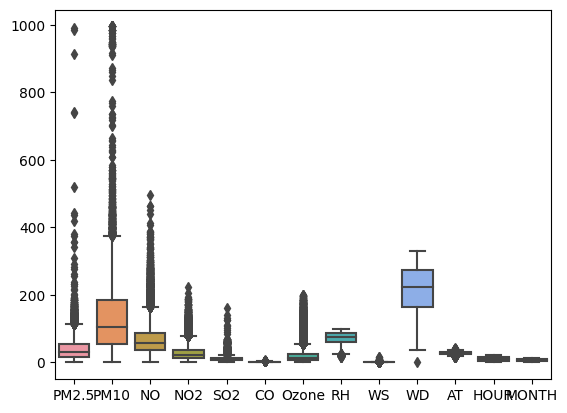

In [ ]:
# Plot a box plot of the data
sns.boxplot(data=df)

In [ ]:
# Compute the first and third quartiles (Q1 and Q3)
Q1 = df.iloc[:, 1:12].quantile(0.05)
Q3 = df.iloc[:, 1:12].quantile(0.95)

# Compute the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

# Replace the outliers with NaN values
df.iloc[:, 1:12] = df.iloc[:, 1:12][(df.iloc[:, 1:12] >= lower) & (df.iloc[:, 1:12] <= upper)]

In [ ]:
df['PM10']=df['PM10'].fillna(df.groupby(['MONTH','HOUR'])['PM10'].transform('mean'))
df['PM2.5']=df['PM2.5'].fillna(df.groupby(['MONTH','HOUR'])['PM2.5'].transform('mean'))
df['NO2']=df['NO2'].fillna(df.groupby(['MONTH','HOUR'])['NO2'].transform('mean'))
df['NO']=df['NO'].fillna(df.groupby(['MONTH','HOUR'])['NO'].transform('mean'))
df['SO2']=df['SO2'].fillna(df.groupby(['MONTH','HOUR'])['SO2'].transform('mean'))
df['CO']=df['CO'].fillna(df.groupby(['MONTH','HOUR'])['CO'].transform('mean'))
df['Ozone']=df['Ozone'].fillna(df.groupby(['MONTH','HOUR'])['Ozone'].transform('mean'))
df['RH']=df['RH'].fillna(df.groupby(['MONTH','HOUR'])['RH'].transform('mean'))
df['WS']=df['WS'].fillna(df.groupby(['MONTH','HOUR'])['WS'].transform('mean'))
df['WD']=df['WD'].fillna(df.groupby(['MONTH','HOUR'])['WD'].transform('mean'))
df['AT']=df['AT'].fillna(df.groupby(['MONTH','HOUR'])['AT'].transform('mean'))

<AxesSubplot:>

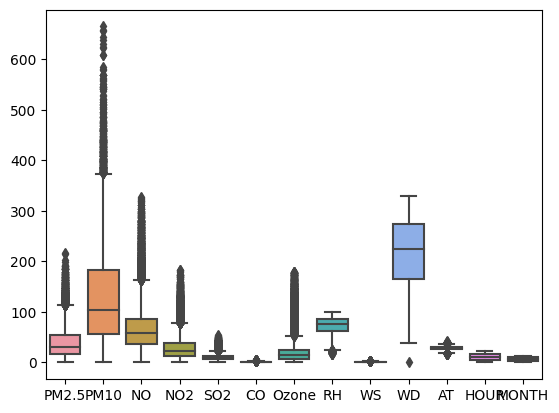

In [ ]:
# Plot a box plot of the data
sns.boxplot(data=df)


In [ ]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date    0
PM2.5        0
PM10         0
NO           0
NO2          0
SO2          0
CO           0
Ozone        0
RH           0
WS           0
WD           0
AT           0
HOUR         0
MONTH        0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_14984\663935864.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df.skew())


PM2.5    1.221897
PM10     1.029309
NO       1.466009
NO2      1.611543
SO2      1.650291
CO       0.829973
Ozone    2.688000
RH      -0.551609
WS       1.627017
WD      -0.241632
AT       0.173133
HOUR     0.000012
MONTH   -0.070892
dtype: float64

<AxesSubplot:xlabel='PM10', ylabel='Count'>

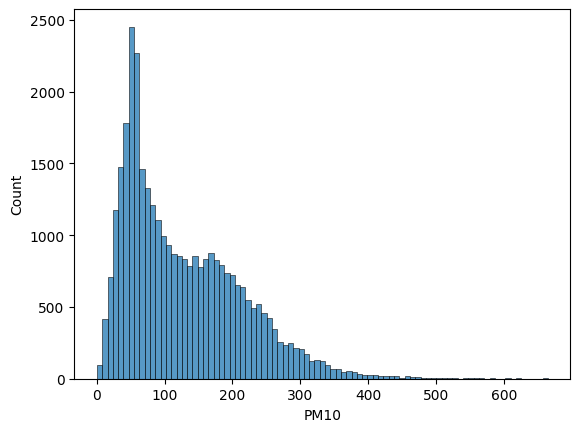

In [ ]:
# Checking the skewness again
display(df.skew())

# Plot a histogram of the data
display(sns.histplot(df['PM10'], kde=False))

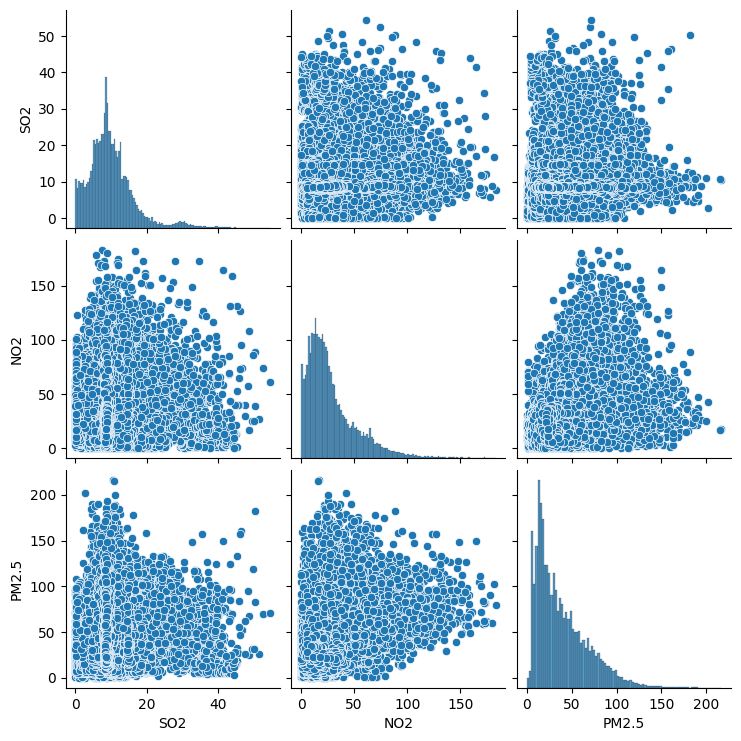

In [ ]:
sns.pairplot(df[['SO2','NO2','PM2.5']])

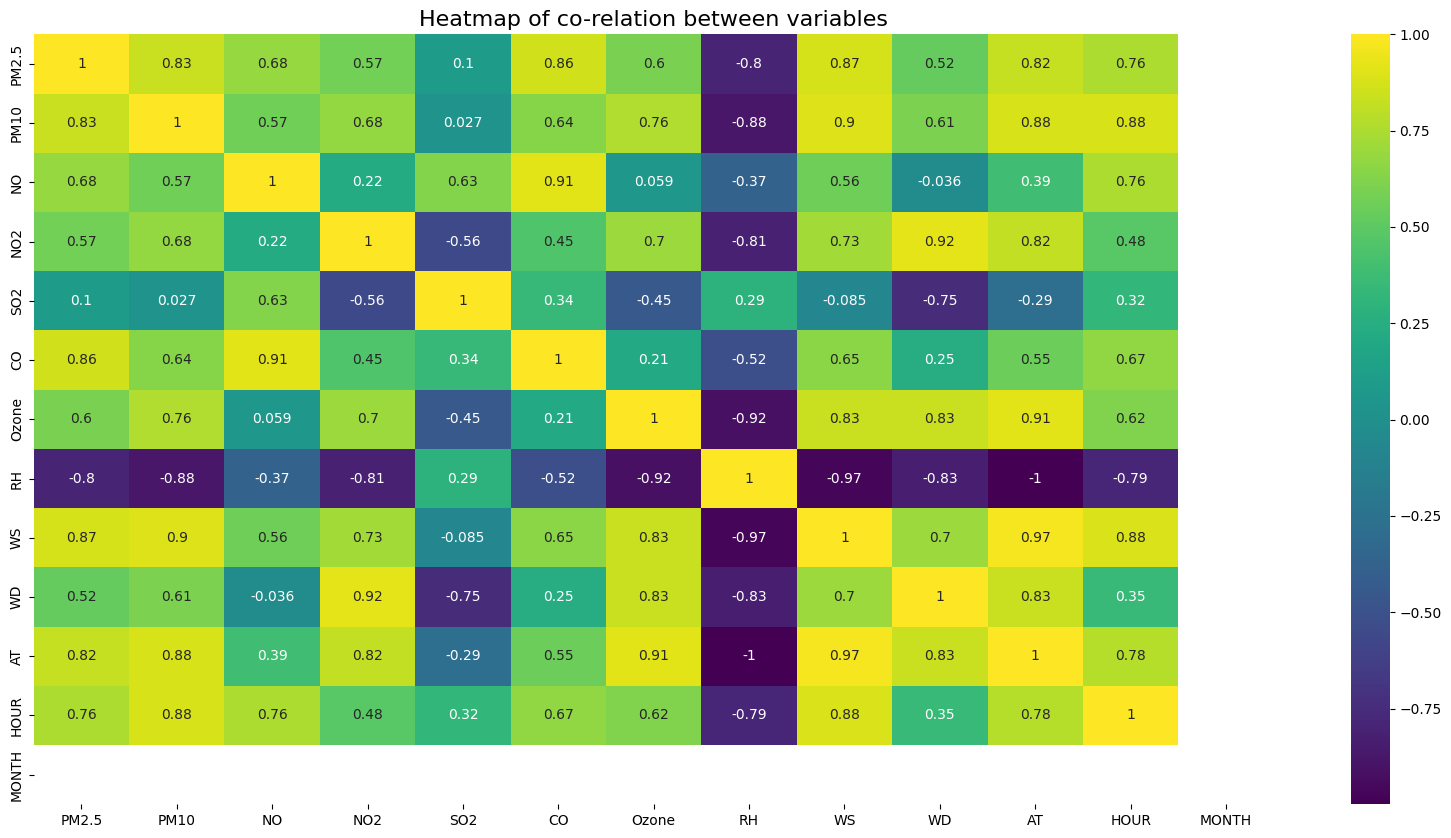

In [ ]:
#Use heatmap to see corelation between variables
plt.figure(figsize=(20,10))

sns.heatmap(df.iloc[1:11].corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()